<a href="https://colab.research.google.com/github/Prachiti15/heart-disaease-detection/blob/main/Heart_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#To check a person has a heart disease or not so that appropriate mearsure can be taken


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns


In [ ]:
from google.colab import files
upload = files.upload()


Saving heart_disease.csv to heart_disease.csv


In [ ]:
df=pd.read_csv('heart_disease.csv')
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
#count of enpty or no values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
disease        0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
#view some basic statistics 
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# get a coutn of number of individuals with cardiovascular disease and without
df['disease'].value_counts()

0    35021
1    34979
Name: disease, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


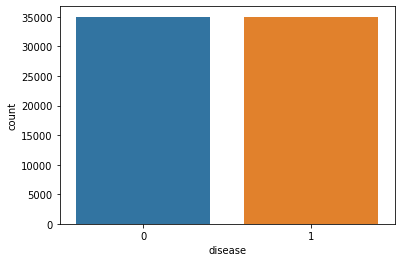

In [ ]:
#visualize the count
sns.countplot(df['disease'])

In [ ]:
df['years']= (df['age']/365).round(0)
df['years']= pd.to_numeric(df['years'],downcast='integer')

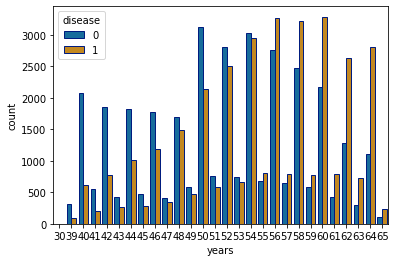

In [ ]:
from seaborn.widgets import dark_palette
# look at the number of people with a cardiovascular disease that exceed the number of people that exceed the number of people without cardiovascular disease
sns.countplot(x='years', hue='disease',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [ ]:
#correlation of the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


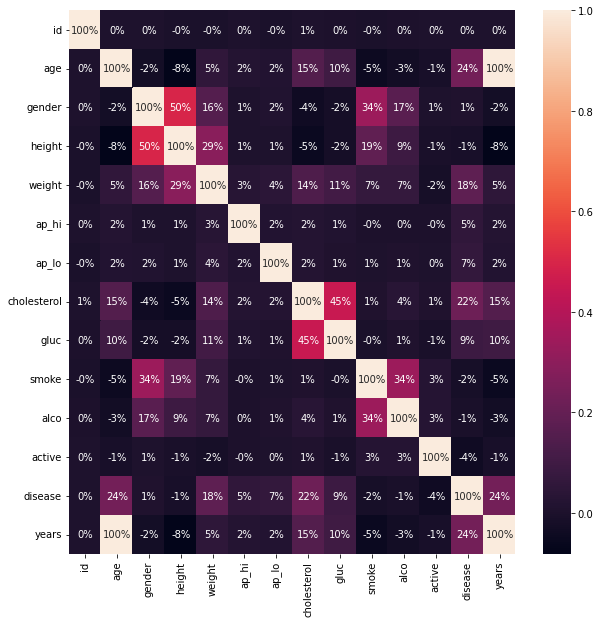

In [ ]:
#visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [ ]:
#dropping years column
df=df.drop('years',axis=1)

In [ ]:
#drop the id column
df=df.drop('id',axis=1)

In [ ]:
#split the data into featured and target data
X = df.iloc[:, :-1].values
Y = df.iloc[:,-1].values

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import sklearn
print (sklearn.__version__)



1.2.1


In [ ]:
#split the data again into 75% tarining dataset and 25% testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [ ]:
#feature scaling
#sacle the values in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#creating ML model using Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy',random_state= 1)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
#test the models accuracy on training data
model =forest
model.score(X_train, Y_train)

0.979904761904762

In [ ]:
#test the models accuracy on test data
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, model.predict(X_test))

TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print(cm)
print('The Test Accuracy of the model is: {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[6487 2122]
 [3093 5798]]
The Test Accuracy of the model is: 0.702
